In [1]:
# Introducción

### Describir con lo que trabajamos, enumerar objetivos y su importancia

#! Describir los objetivos (con lo que vamos a trabajar)

#? Ejemplo: (Objetivo principal) Saber predecir si una transacción es fraudulenta o no
#?                               ¿De qué depende que una transaccion sea fraudulenta?
#?                               Si la cantidad sacada es alta, ¿hay mayor probabilidad de que sea fraudulenta?
#?                               ¿A que hora es más probable que haya una transacción fraudulenta?
#? Hasta 5 objetivos


# Datos
##? Describir la fuente de información
##? Variables disponibles
##? Datos recopilados (base de conocimiento)
##! Como se han preparado (limpieza, transformación, creación de variables, etc)
## Dificultades


# Clasificación

## Que modelo es mas apropiado (arbol de decisión, clasificación bayesiana, etc)
## ¿Qué variables son las mas importantes? ¿Por qué? ¿Cómo se puede mejorar el modelo?
## Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Agrupamiento
## Mejor modelo para agrupamiento (basado en prototipos, jerárquico, etc)
### Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Conlusión
## Como se usan nuestros modelos para mejorar la empresa


# Material consultado
## Bibliografía




# Datos de la base de conocimiento

## Variables Time V1-V28 Amount Fraud
## Septiembre de 2013
## 2 dias (Maximo 172792 segundos)


# Preguntas profesor
# Cuando comienza el tiempo. (Si el segundo 0 => 00:00)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
credit_df = pd.read_csv('./data/creditcard.csv')

#### Pasamos a quitar las variables más correlacionadas para ahorrar tiempo a la hora de analizar outliers y desbalancear la clase objetivo

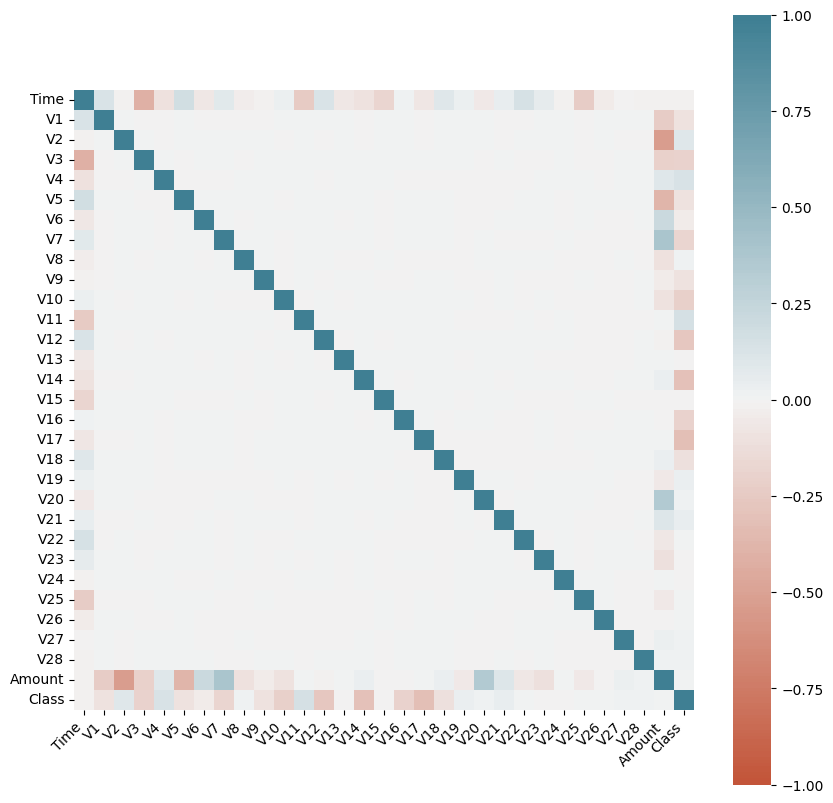

In [4]:
import seaborn as sns

data_corr = credit_df.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    data_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('./correlation_matrix.png')

Los resultados indican que no existe correlacción entre los atributos, esto es debido a la transformación PCA

#### Normalizamos el atributo Amount

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
credit_df[['Amount']] = scaler.fit_transform(credit_df[['Amount']])

#### Outliers

#### Visualizamos los ouliers usando la formula del IQR

In [6]:
credit_df_test = credit_df.drop(['Class', 'Time'], axis=1)

for column in credit_df_test.columns:
    media = np.mean(credit_df[column])
    desviacion_estandar = np.std(credit_df[column])
    umbral = 3 * desviacion_estandar
    outliers = credit_df[abs(credit_df[column] - media) > umbral]
    if len(outliers) > 0:
        info = f"Columna {column}: {len(outliers)} outliers" + "\n"
        with open("./outliers/outliers_3desviacion_estandar.txt", "a") as file:
            file.write(info)

In [7]:
for column in credit_df_test.columns:
    Q1 = credit_df[column].quantile(0.25)
    Q3 = credit_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = credit_df[(credit_df[column] < Q1 - 3*IQR) | (credit_df[column] > Q3 + 3*IQR)]
    if len(outliers) > 0:
        txt_to_file = "--------------------------------------------------" + "\n"
        txt_to_file += f"Columna: {column}" + "\n"
        txt_to_file += f"Outliers: {len(outliers)}" + "\n"
        with open("./outliers/outliers_IQR.txt", "a") as file:
            file.write(txt_to_file)

In [8]:
from matplotlib import pyplot as plt

for columna in credit_df_test:
    plt.boxplot(credit_df[columna])
    plt.title(columna)
    plt.savefig(f'./outliers/plots/boxplot_{columna}.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

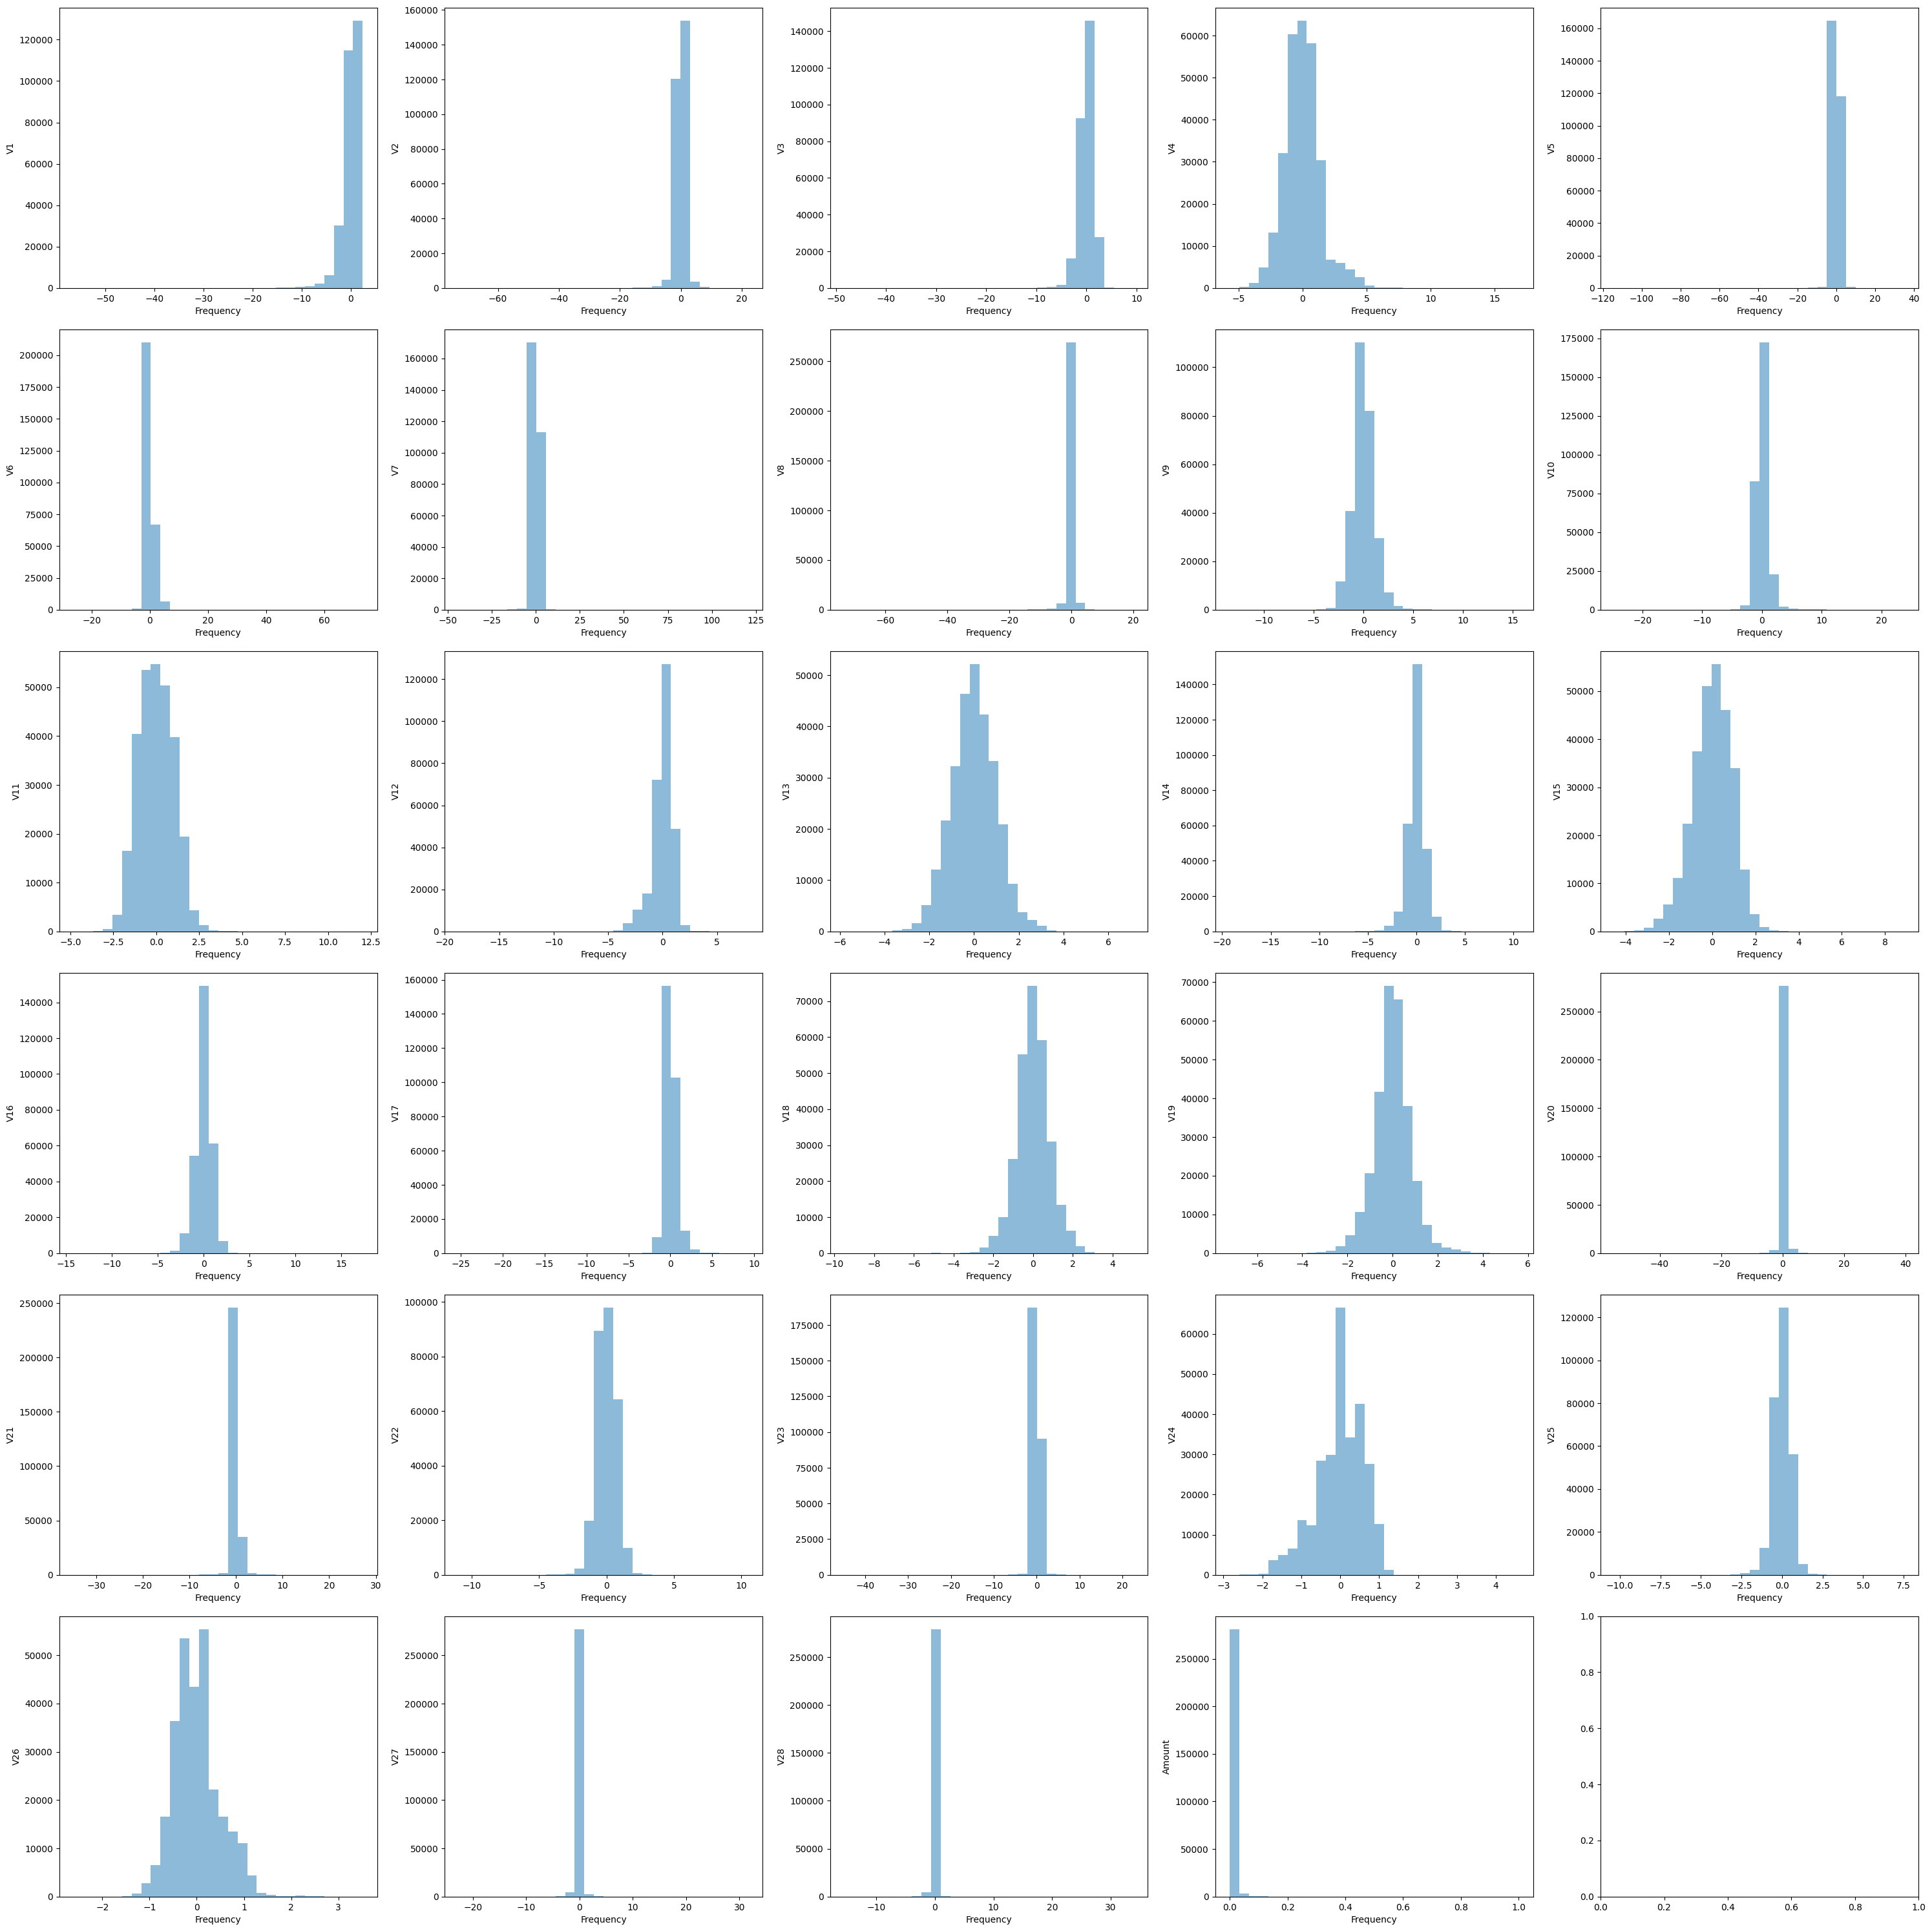

In [9]:
fig, axs = plt.subplots(6, 5, figsize=(30, 30))
axs = axs.flatten()
for i, col in enumerate(credit_df.drop(['Class', 'Time'], axis=1).columns):
    axs[i].hist(credit_df[col], bins=30, orientation='vertical', alpha=0.5)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Frequency')
plt.tight_layout()
plt.savefig('./outliers/freq_histogram.png')

#### Pasamos a eliminar los outliers que pasen un umbral arbitrario para cada atributo

In [10]:
credit_df.drop(credit_df[credit_df['V1'] <= -39].index, inplace=True)

credit_df.drop(credit_df[credit_df['V2'] >= 20].index, inplace=True)
credit_df.drop(credit_df[credit_df['V2'] <= -40].index, inplace=True)

credit_df.drop(credit_df[credit_df['V3'] >= 9].index, inplace=True)
credit_df.drop(credit_df[credit_df['V3'] <= -40].index, inplace=True)

credit_df.drop(credit_df[credit_df['V4'] >= 15].index, inplace=True)

credit_df.drop(credit_df[credit_df['V5'] <= -40].index, inplace=True)

credit_df.drop(credit_df[credit_df['V6'] >= 60].index, inplace=True)
credit_df.drop(credit_df[credit_df['V6'] <= -25].index, inplace=True)

credit_df.drop(credit_df[credit_df['V7'] >= 100].index, inplace=True)

credit_df.drop(credit_df[credit_df['V8'] <= -50].index, inplace=True)

credit_df.drop(credit_df[credit_df['V9'] >= 10].index, inplace=True)
credit_df.drop(credit_df[credit_df['V9'] <= -10].index, inplace=True)

credit_df.drop(credit_df[credit_df['V10'] >= 20].index, inplace=True)
credit_df.drop(credit_df[credit_df['V10'] <= -20].index, inplace=True)

credit_df.drop(credit_df[credit_df['V12'] >= 5].index, inplace=True)

credit_df.drop(credit_df[credit_df['V13'] >= 6].index, inplace=True)
credit_df.drop(credit_df[credit_df['V13'] <= -5].index, inplace=True)

credit_df.drop(credit_df[credit_df['V14'] >= 10].index, inplace=True)

credit_df.drop(credit_df[credit_df['V15'] >= 8].index, inplace=True)

credit_df.drop(credit_df[credit_df['V16'] >= 15].index, inplace=True)

credit_df.drop(credit_df[credit_df['V17'] <= -25].index, inplace=True)

credit_df.drop(credit_df[credit_df['V19'] <= -6].index, inplace=True)

credit_df.drop(credit_df[credit_df['V20'] >= 30].index, inplace=True)
credit_df.drop(credit_df[credit_df['V20'] <= -40].index, inplace=True)

credit_df.drop(credit_df[credit_df['V21'] >= 27].index, inplace=True)
credit_df.drop(credit_df[credit_df['V21'] <= -30].index, inplace=True)

credit_df.drop(credit_df[credit_df['V22'] >= 10].index, inplace=True)
credit_df.drop(credit_df[credit_df['V22'] <= -10].index, inplace=True)

credit_df.drop(credit_df[credit_df['V23'] <= -40].index, inplace=True)

credit_df.drop(credit_df[credit_df['V24'] >= 4].index, inplace=True)

credit_df.drop(credit_df[credit_df['V25'] >= 7.5].index, inplace=True)
credit_df.drop(credit_df[credit_df['V25'] <= -10].index, inplace=True)

credit_df.drop(credit_df[credit_df['V26'] <= -2].index, inplace=True)

credit_df.drop(credit_df[credit_df['V27'] >= 20].index, inplace=True)
credit_df.drop(credit_df[credit_df['V27'] <= -20].index, inplace=True)

credit_df.drop(credit_df[credit_df['V28'] >= 20].index, inplace=True)
credit_df.drop(credit_df[credit_df['V28'] <= -10].index, inplace=True)

credit_df.drop(credit_df[credit_df['Amount'] >= 0.6].index, inplace=True)

#### Analizamos si la clase objetivo está desbalanceado mirando los valores totales que toman la columna de Class

Eliminamos duplicados

In [11]:
duplicates = credit_df.duplicated()
print(duplicates.sum())
if duplicates.sum() > 0:
    credit_df.drop_duplicates(inplace=True)
    print('duplicates deleted')

1073
duplicates deleted


#### Clase muy desbalanceada

In [12]:
print(credit_df['Class'].value_counts())

0    283221
1       465
Name: Class, dtype: int64


In [13]:
FEATURES = credit_df.drop(['Class'], axis=1) # Features
TARGET = credit_df['Class']                  # Target

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) # Crea un objeto SMOTE con semilla 42
X_sm, y_sm = smote.fit_resample(FEATURES, TARGET)

In [15]:
cc_resampled = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm)], axis=1)

In [16]:
print('Valores de la columna Class:')
cc_resampled['Class'].describe()

Valores de la columna Class:


count    566442.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

#### Transform time attribute

#### Ajustamos el valor de tiempo a un rango para análisis posterior

In [17]:
import math

def convert_to_hours(time_diff):
    """
    Rounds the given time differences (in seconds) to the nearest whole number of hours.
    """
    if time_diff >= 86400:
        time_diff = time_diff / 2

    return int(math.floor(time_diff / 3600))

cc_time_range_balanced_df = cc_resampled.copy()
cc_time_range_unbalanced_df = credit_df.copy()

cc_time_range_balanced_df['Hour'] = cc_time_range_balanced_df['Time'].apply(convert_to_hours)
cc_time_range_unbalanced_df['Hour'] = cc_time_range_unbalanced_df['Time'].apply(convert_to_hours)

last_column_balanced = cc_time_range_balanced_df.pop('Hour')
last_column_unbalanced = cc_time_range_unbalanced_df.pop('Hour')

cc_time_range_balanced_df.drop(['Time'], axis = 1, inplace = True)
cc_time_range_unbalanced_df.drop(['Time'], axis = 1, inplace = True)

cc_time_range_balanced_df.insert(0, 'Hour', last_column_balanced)
cc_time_range_unbalanced_df.insert(0, 'Hour', last_column_unbalanced)

cc_time_range_balanced_df.sort_values(by=['Hour'], inplace=True)
cc_time_range_unbalanced_df.sort_values(by=['Hour'], inplace=True)

cc_time_range_balanced_df.to_csv('./data/creditcard_balanced.csv', index=False)
cc_time_range_unbalanced_df.to_csv('./data/creditcard_unbalanced.csv', index=False)

cc_time_range_balanced_df.to_pickle('./pickled/creditcard_balanced.pkl')
cc_time_range_unbalanced_df.to_pickle('./pickled/creditcard_unbalanced.pkl')

In [18]:
print(cc_time_range_balanced_df['Class'].value_counts())
print(cc_time_range_unbalanced_df['Class'].value_counts())
print(cc_time_range_balanced_df['Hour'].value_counts())
print(cc_time_range_unbalanced_df['Hour'].value_counts())

0    283221
1    283221
Name: Class, dtype: int64
0    283221
1       465
Name: Class, dtype: int64
21    54037
20    44089
19    43609
17    42206
18    38713
11    34174
13    33469
22    32310
23    31820
16    31449
14    26685
15    26420
12    26381
7     17756
9     17049
2     14641
3      9670
10     9218
5      8758
8      8263
4      4957
0      4695
1      3412
6      2661
Name: Hour, dtype: int64
21    25907
20    25823
19    25017
17    24482
22    24453
18    23979
16    20779
23    17314
15    13934
12    13413
13    10965
14    10438
11     8471
10     8246
9      7839
8      5148
0      3931
7      3365
1      2213
6      1822
3      1818
5      1679
2      1568
4      1082
Name: Hour, dtype: int64
